# <font color='blue'>Lab 9 - CCPS 844 Data Mining</font>
# <font color='green'>Salman AlMaskati</font>

### <font color='red'> Answer the following questions and submit a PDF file on the D2L.</font>


**Select a dataset of your choice.**

* Find number of optimal features from your dataset using the Recursive feature elimination with cross-validation.
* Prepare a dataset with optimal features and call info and describe methods on it
* Apply PCA on the dataset (with optimal features) to get a dataset with reduced dimenion
* There should be a reason to pick n_components to reduce the dimension of the dataset by using PCA
* What is the dimension of the dataset before and after applying PCA?

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
%matplotlib inline

In [97]:
df= pd.read_csv("pima-indians-diabetes.csv",index_col=0)
df

features = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age']
X=df[features]
y=df.label
X

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age
1,6,148,72,35,0,33.6,0.627,50
2,1,85,66,29,0,26.6,0.351,31
3,8,183,64,0,0,23.3,0.672,32
4,1,89,66,23,94,28.1,0.167,21
5,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63
765,2,122,70,27,0,36.8,0.340,27
766,5,121,72,23,112,26.2,0.245,30
767,1,126,60,0,0,30.1,0.349,47


In [98]:
from sklearn.linear_model import LogisticRegression
logit=LogisticRegression(multi_class='ovr',solver='lbfgs',max_iter=1000)

In [99]:
rfecv = RFECV(estimator=logit, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LogisticRegression(max_iter=1000, multi_class='ovr'),
      scoring='accuracy')

In [100]:
print(f"Optimal number of features : {rfecv.n_features_}")

Optimal number of features : 8


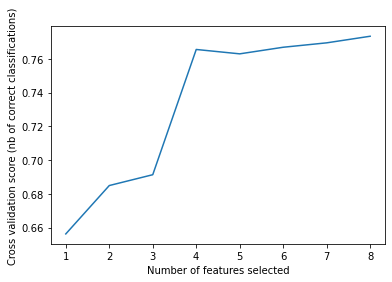

In [101]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [102]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB
None
         pregnant     glucose          bp        skin     insulin         bmi  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%   

**PCA**

In [105]:
from sklearn import decomposition
pca_X = X
pca = decomposition.PCA(n_components=2)
pca.fit(pca_X)
pca_X = pca.transform(X)
pca_X.shape
print(f"Dimenstions before PCA: {X.shape}\nDimenstions after PCA: {pca_X.shape}")

Dimenstions before PCA: (768, 8)
Dimenstions after PCA: (768, 2)
